In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv('diabetes.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [79]:
new_df = df.copy()

In [80]:
new_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
new_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
new_df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [84]:
cols = list(new_df.drop(['Pregnancies','DiabetesPedigreeFunction','Outcome'],axis=1).columns)
cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [85]:
for i in range(len(cols)):
    print(cols[i] + " - "+ str(new_df[cols[i]][new_df[cols[i]]==0].count()))

Glucose - 5
BloodPressure - 35
SkinThickness - 227
Insulin - 374
BMI - 11
Age - 0


In [86]:
BP_med = new_df['BloodPressure'].median()
print(BP_med)
ST_med = new_df['SkinThickness'].median()
print(ST_med)
Insulin_med = new_df['Insulin'].median()
print(Insulin_med)
BMI_med = new_df['BMI'].median()
print(BMI_med)
Glucose_med = new_df['Glucose'].median()
print(Glucose_med)

72.0
23.0
30.5
32.0
117.0


In [87]:
new_df['BloodPressure']=new_df['BloodPressure'].replace(0,BP_med)
new_df['SkinThickness']=new_df['SkinThickness'].replace(0,ST_med)
new_df['Insulin']=new_df['Insulin'].replace(0,Insulin_med)
new_df['BMI']=new_df['BMI'].replace(0,BMI_med)
new_df['Glucose']=new_df['Glucose'].replace(0,Glucose_med)

In [88]:
new_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [89]:
X = new_df.drop('Outcome', axis=1)
y = new_df['Outcome']

In [90]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


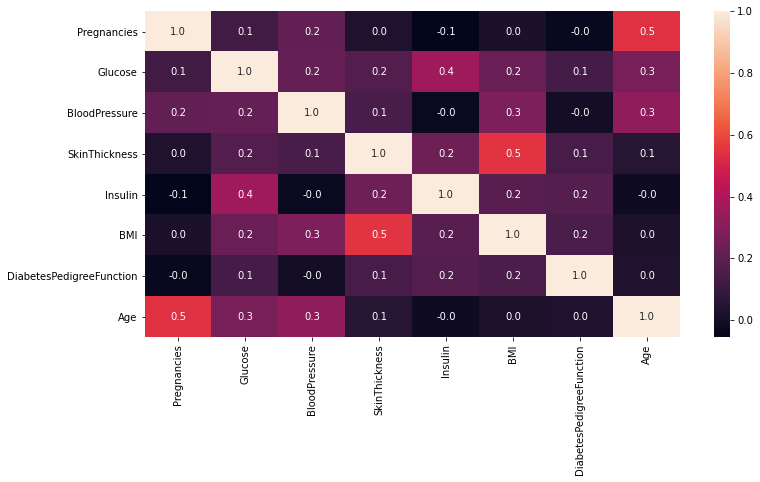

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(), fmt=".1f",annot=True);

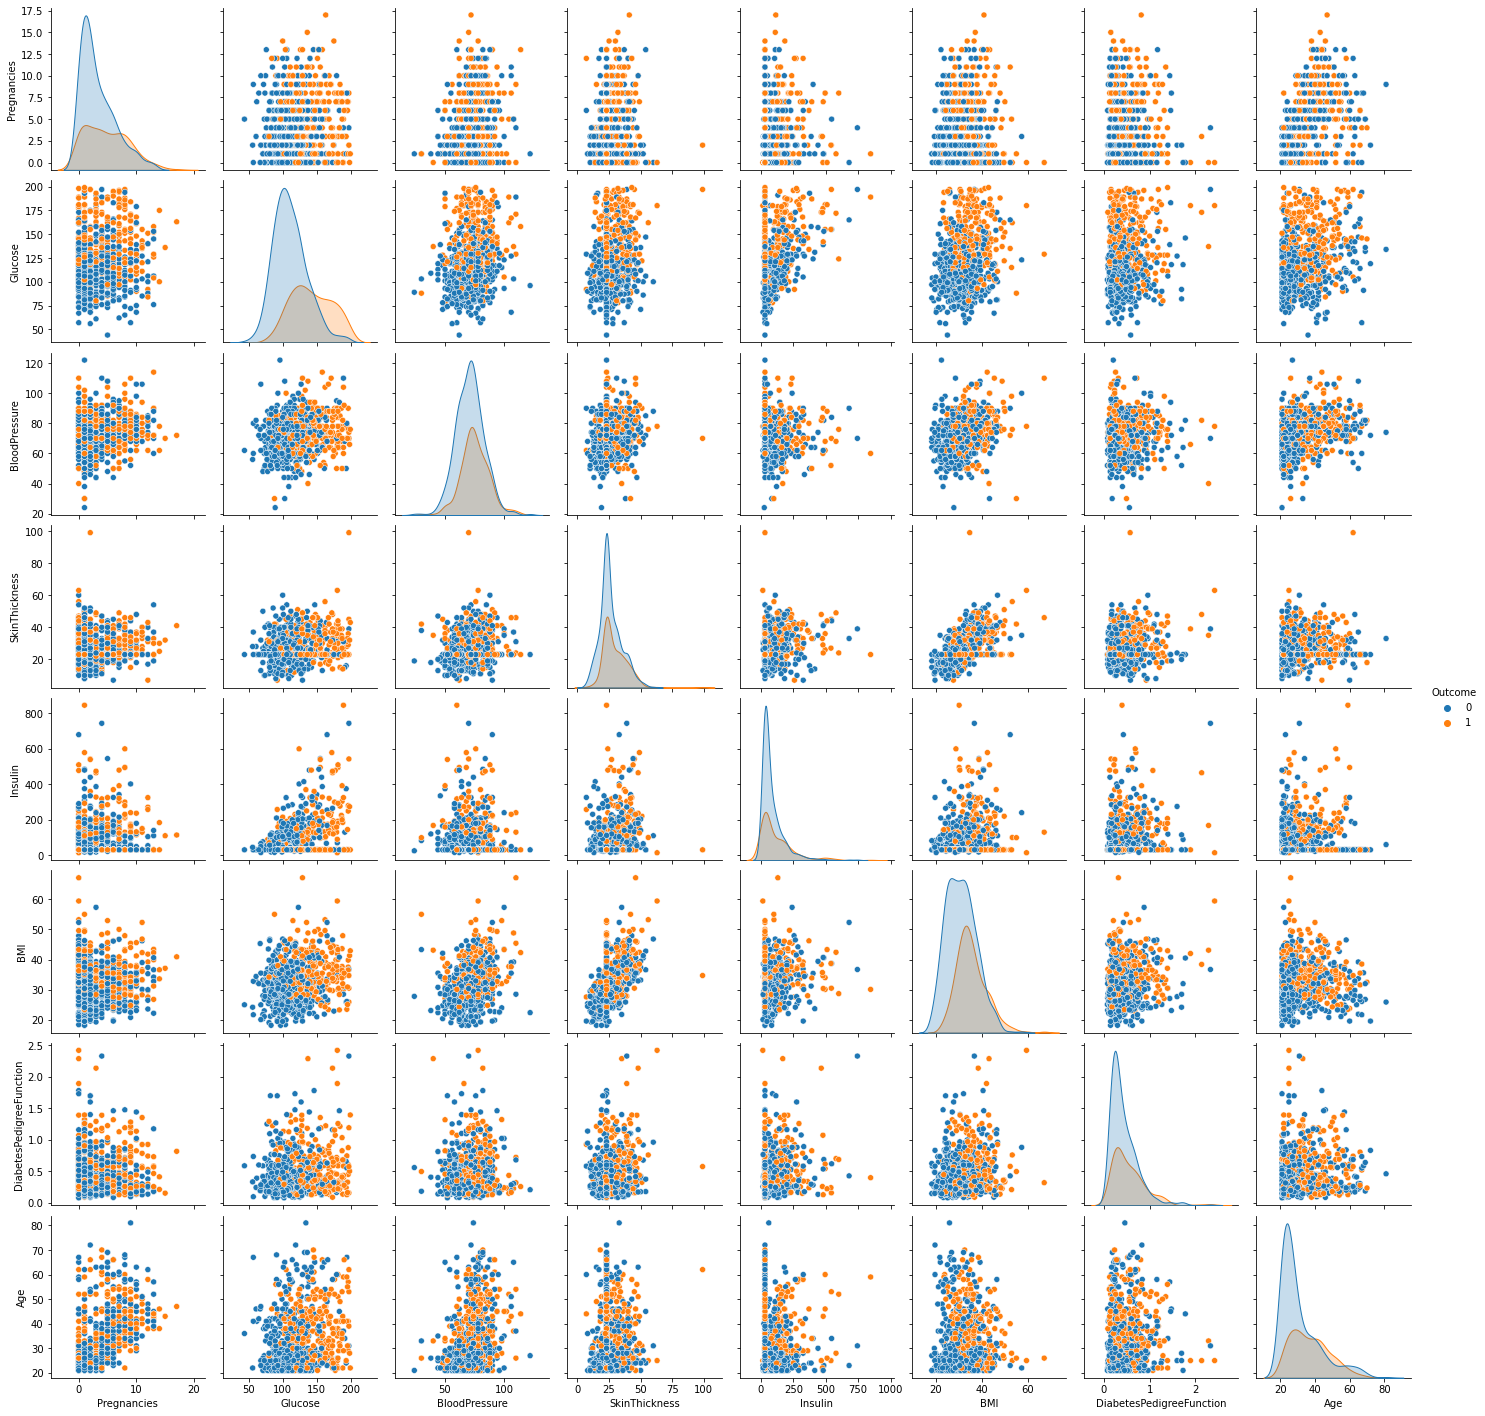

In [92]:
sns.pairplot(new_df, hue='Outcome');

In [93]:
new_df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

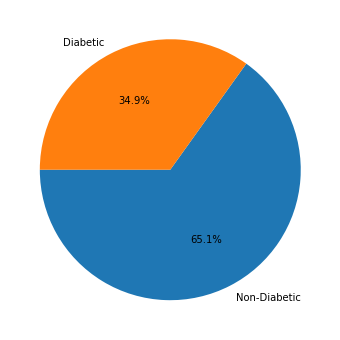

In [94]:
D = new_df['Outcome'].value_counts()
plt.figure(figsize=(12,6))
lab = ['Non-Diabetic', 'Diabetic']
plt.pie(D, labels=lab, autopct='%1.1f%%', startangle=180);

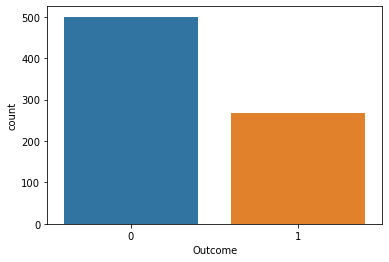

In [95]:
sns.countplot(x=df['Outcome']);

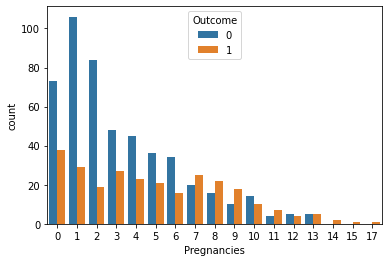

In [96]:
sns.countplot(x='Pregnancies', hue='Outcome', data=new_df);

######  Higher the number of pregnancies, more is the risk of having diabetes.



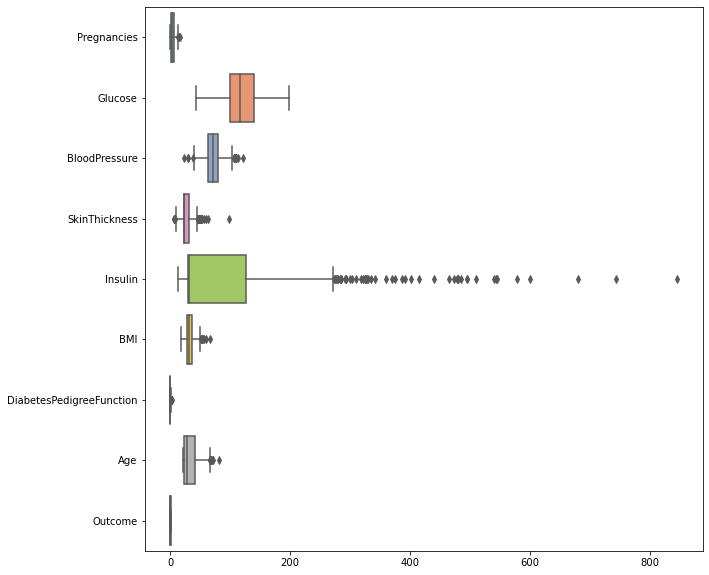

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df, orient="h", palette="Set2");

In [98]:
new_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

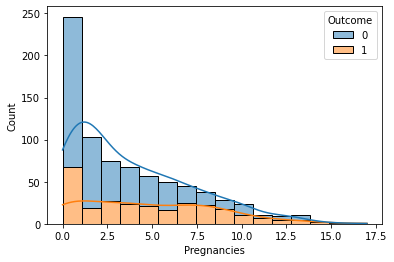

In [99]:
sns.histplot(data=new_df, x="Pregnancies", hue="Outcome", multiple="stack", kde=True);

#### Right Skewed - Higher the number of pregnancies more is the chance of being diabetic

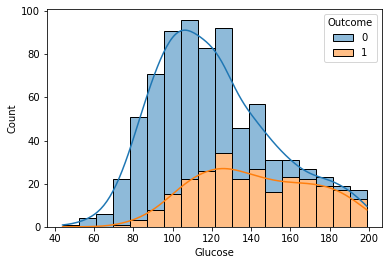

In [100]:
sns.histplot(data=new_df, x="Glucose", hue="Outcome", multiple="stack", kde=True);

#### Higher the level of glucose more is the chance of being Diabetic

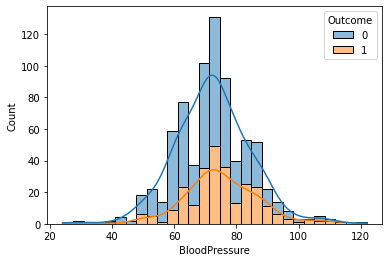

In [101]:
sns.histplot(data=new_df, x="BloodPressure", hue="Outcome", multiple="stack", kde=True);

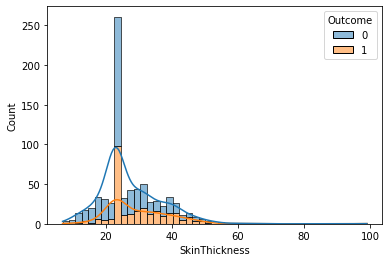

In [102]:
sns.histplot(data=new_df, x="SkinThickness", hue="Outcome", multiple="stack", kde=True);

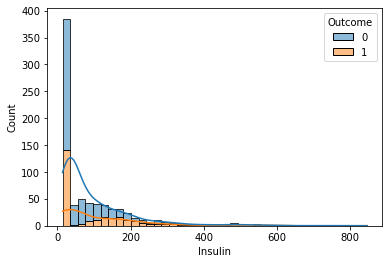

In [103]:
sns.histplot(data=new_df, x="Insulin", hue="Outcome", multiple="stack", kde=True);

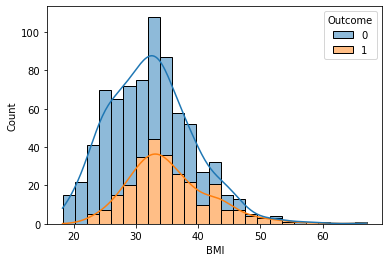

In [104]:
sns.histplot(data=new_df, x="BMI", hue="Outcome", multiple="stack", kde=True);

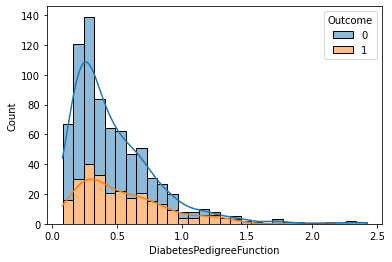

In [105]:
sns.histplot(data=new_df, x="DiabetesPedigreeFunction", hue="Outcome", multiple="stack", kde=True);

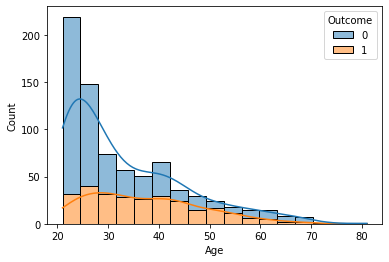

In [106]:
sns.histplot(data=new_df, x="Age", hue="Outcome", multiple="stack", kde=True);

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
scaler.fit(new_df.drop('Outcome', axis=1))

StandardScaler()

In [109]:
pkl_scaler = pd.to_pickle(scaler,"scale.pkl")

In [110]:
scaler_features = scaler.transform(new_df.drop('Outcome', axis=1))
scaler_features 

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [111]:
df_feat = pd.DataFrame(scaler_features, columns=new_df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = df_feat
y = new_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train);
predictions = logmodel.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

In [117]:
print(accuracy_score(y_test, predictions))
print(roc_auc_score(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

0.7857142857142857
0.7457643251475348
[[89 14]
 [19 32]]


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.70      0.63      0.66        51

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



In [118]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [119]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

0.7922077922077922
0.7506186940795736
[[90 13]
 [19 32]]


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.71      0.63      0.67        51

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [122]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

0.6818181818181818
[[76 27]
 [22 29]]


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       103
           1       0.52      0.57      0.54        51

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.69      0.68      0.69       154



In [123]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

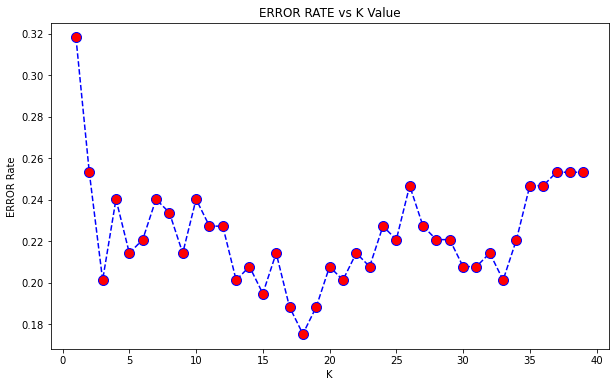

In [124]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('ERROR RATE vs K Value')
plt.xlabel('K')
plt.ylabel('ERROR Rate');

In [125]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(accuracy_score(y_test, knn_pred))
print(roc_auc_score(y_test,knn_pred))
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

0.8246753246753247
0.7748905387397678
[[95  8]
 [19 32]]


              precision    recall  f1-score   support

           0       0.83      0.92      0.88       103
           1       0.80      0.63      0.70        51

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.82       154



In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
tree_pred = dtree.predict(X_test)

In [128]:
print(accuracy_score(y_test, tree_pred))
print(roc_auc_score(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))
print('\n')
print(classification_report(y_test, tree_pred))

0.6948051948051948
0.6580049495526367
[[79 24]
 [23 28]]


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       103
           1       0.54      0.55      0.54        51

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.70      0.69      0.70       154



In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [131]:
print(accuracy_score(y_test, rfc_pred))
print(roc_auc_score(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

0.7662337662337663
0.7312012183514183
[[86 17]
 [19 32]]


              precision    recall  f1-score   support

           0       0.82      0.83      0.83       103
           1       0.65      0.63      0.64        51

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.77      0.77       154



In [132]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'metric':['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='accuracy', cv=10, n_jobs=-1) 
grid_search=grid_search.fit(X_train, y_train)
print(grid_search.best_params_ )

{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}


In [133]:
knn2 = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 17, weights= 'uniform')
knn2.fit(X_train, y_train)
pred = knn2.predict(X_test)

print(accuracy_score(y_test, pred))
print(roc_auc_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

0.8116883116883117
0.7651818008756901
[[93 10]
 [19 32]]


              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.76      0.63      0.69        51

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [134]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]



random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='accuracy',
                              n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)

rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [135]:
# classifier = RandomForestClassifier(n_estimators=1100, min_samples_split=15,min_samples_leaf=10,max_features='sqrt',
#  max_depth=5)
# classifier.fit(X_train,y_train)
y_pred =rf_random.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

0.7922077922077922
0.745669141442985
[[91 12]
 [20 31]]


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       103
           1       0.72      0.61      0.66        51

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [136]:
# print(knn2.predict([[6,148,72,35,30.5,33.6,0.627,50]]))
# print(knn2.predict([[1,85,66,29,30.5,26.6,0.351,31]]))
# print(knn2.predict([[0,80,80,20,80,23.1,0.52,34]]))

In [137]:
# print(knn2.predict(X_test))

In [138]:
# data = np.array([1,85,66,29,30.5,26.6,0.351,31])
# sc_data = scaler.transform(data.reshape(1,-1))
# sc_data

In [139]:
# print(knn2.predict(sc_data))

In [140]:
# data2 = np.array([0,80,80,20,80,23.1,0.52,34])
# sc_data2 = scaler.transform(data2.reshape(1,-1))
# sc_data2

In [141]:
# print(knn2.predict(sc_data2))

In [142]:
# data3 = np.array([6,148,72,35,30.5,33.6,0.627,50])
# sc_data3 = scaler.transform(data3.reshape(1,-1))
# sc_data3

In [143]:
# print(knn2.predict(sc_data3))

In [144]:
model = pd.to_pickle(knn2,'model.pkl')